<a href="https://colab.research.google.com/github/Brandon-lz/master/blob/main/aicodes/12Keras/Keras%E9%AB%98%E5%B1%82API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, optimizers, Sequential, metrics

### metrics

In [11]:
def preprocess(x,y):
  x = tf.cast(x,dtype=tf.float32)/255.
  y = tf.cast(y,dtype=tf.int32)
  return x,y

In [12]:
batchsz = 128
(x,y), (x_val,y_val) = datasets.mnist.load_data()
print('datasets:',x.shape,y.shape,x.min(),x.max())

datasets: (60000, 28, 28) (60000,) 0 255


In [13]:
db = tf.data.Dataset.from_tensor_slices((x,y))
db = db.map(preprocess).shuffle(60000).batch(batchsz)#.repeat(10)

ds_val = tf.data.Dataset.from_tensor_slices((x_val,y_val))
ds_val = ds_val.map(preprocess).batch(batchsz)

In [14]:
network = Sequential([
     layers.Dense(256,activation='relu'),
     layers.Dense(128,activation='relu'),
     layers.Dense(64,activation='relu'),
     layers.Dense(32,activation='relu'),
     layers.Dense(10,activation='relu'),                 
])
network.build(input_shape=(None,28*28))
network.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [15]:
optimizer = optimizers.Adam(lr=0.01)

创建两个meter

In [16]:
acc_meter = metrics.Accuracy()    #用于测量准确度
loss_meter = metrics.Mean()    #用于测量均值

In [17]:
for epoch in range(10):  
  for step,(x,y) in enumerate(db):
    with tf.GradientTape() as tape:
      x = tf.reshape(x,(-1,28*28))
      out = network(x)
      y_onehot = tf.one_hot(y,depth=10)
      loss = tf.reduce_mean(tf.losses.categorical_crossentropy(y_onehot,out,from_logits=True))
      
      loss_meter.update_state(loss)     #添加一个值

    grads = tape.gradient(loss,network.trainable_variables)
    optimizer.apply_gradients(zip(grads,network.trainable_variables))

    if step%100==0:
      print('epoch:',epoch,'step:',step,'loss:',loss_meter.result().numpy())
      loss_meter.reset_states()     #清除当前的数据，重新记录

    #测试
    if step%500==0:
      total,total_correct=0.,0
      acc_meter.reset_states()

      for step2,(x,y) in enumerate(ds_val):
        x = tf.reshape(x,(-1,28*28))
        out = network(x)

        pred = tf.argmax(out,axis=1)
        pred = tf.cast(pred,dtype=tf.int32)

        correct = tf.equal(pred,y)
        total_correct += tf.reduce_sum(tf.cast(correct,dtype=tf.int32)).numpy()
        total += x.shape[0]

        acc_meter.update_state(y,pred)   #这一行与上面三行等价
      
      print(step,'Evaluate Acc',total_correct/total,acc_meter.result().numpy())
  

epoch: 0 step: 0 loss: 2.3203716
0 Evaluate Acc 0.1302 0.1302
epoch: 0 step: 100 loss: 1.0682184
epoch: 0 step: 200 loss: 0.66867536
epoch: 0 step: 300 loss: 0.39056453
epoch: 0 step: 400 loss: 0.21141888
epoch: 1 step: 0 loss: 0.1915086
0 Evaluate Acc 0.9549 0.9549
epoch: 1 step: 100 loss: 0.1426422
epoch: 1 step: 200 loss: 0.15127875
epoch: 1 step: 300 loss: 0.16056497
epoch: 1 step: 400 loss: 0.15312347
epoch: 2 step: 0 loss: 0.14817543
0 Evaluate Acc 0.9571 0.9571
epoch: 2 step: 100 loss: 0.11086665
epoch: 2 step: 200 loss: 0.10723315
epoch: 2 step: 300 loss: 0.10819851
epoch: 2 step: 400 loss: 0.115236655
epoch: 3 step: 0 loss: 0.1262594
0 Evaluate Acc 0.9679 0.9679
epoch: 3 step: 100 loss: 0.08969448
epoch: 3 step: 200 loss: 0.09340871
epoch: 3 step: 300 loss: 0.10110837
epoch: 3 step: 400 loss: 0.10761981
epoch: 4 step: 0 loss: 0.11507936
0 Evaluate Acc 0.9739 0.9739
epoch: 4 step: 100 loss: 0.07574764
epoch: 4 step: 200 loss: 0.08130882
epoch: 4 step: 300 loss: 0.07709319
epoch

## Compile & Fit

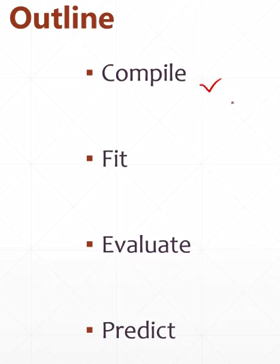

In [18]:

def preprocess(x, y):
  """
  x is a simple image, not a batch
  """
  x = tf.cast(x, dtype=tf.float32) / 255.
  x = tf.reshape(x, [28*28])
  y = tf.cast(y, dtype=tf.int32)
  y = tf.one_hot(y, depth=10)
  return x,y


batchsz = 128
(x, y), (x_val, y_val) = datasets.mnist.load_data()
print('datasets:', x.shape, y.shape, x.min(), x.max())



db = tf.data.Dataset.from_tensor_slices((x,y))
db = db.map(preprocess).shuffle(60000).batch(batchsz)
ds_val = tf.data.Dataset.from_tensor_slices((x_val, y_val))
ds_val = ds_val.map(preprocess).batch(batchsz) 

sample = next(iter(db))
print(sample[0].shape, sample[1].shape)


network = Sequential([layers.Dense(256, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(64, activation='relu'),
                     layers.Dense(32, activation='relu'),
                     layers.Dense(10)])
network.build(input_shape=(None, 28*28))
network.summary()



#设置优化器、设置loss、设置精度测试
network.compile(optimizer=optimizers.Adam(lr=0.01),                
		loss=tf.losses.CategoricalCrossentropy(from_logits=True),
		metrics=['accuracy']
	)

network.fit(db, epochs=10, validation_data=ds_val, validation_freq=2)      #开始训练、测试   epochs:训练多少次，  validation_data：测试用数据集  validation_freq：每隔两次测试一下
 
network.evaluate(ds_val)       #最后再测试一下

datasets: (60000, 28, 28) (60000,) 0 255
(128, 784) (128, 10)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] 

[0.13726776838302612, 0.9703999757766724]